In [1]:
import csv
import math
import itertools
import numpy as np
import matplotlib.pyplot as plt
import pickle
from sklearn import clone
from pylab import rcParams
%matplotlib inline 
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import preprocessing
from statsmodels import robust
from sklearn.metrics import confusion_matrix
from scipy.fftpack import fft, ifft
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm, datasets
from sklearn.svm import SVR
from scipy.stats import kurtosis

In [2]:
def unison_shuffled_copies(a, b):
    assert len(a) == len(b)
    p = np.random.permutation(len(a))
    return a[p], b[p] 

In [3]:
def csv_reader(file_obj):
    reader = csv.reader(file_obj)
    testArray=np.empty((0,4), float)
    testArrayLabel=np.empty((0,1),float)
    for row in reader:
        testArray=np.vstack((testArray,[float(row[0]),float(row[1]),float(row[2]),float(row[3])]))
        testArrayLabel=np.append(testArrayLabel,[float(row[4])])
    return testArray,testArrayLabel

In [4]:
"Features"
def generateFeatures(Temp):
    f0=np.mean(Temp[:,0])
    f1=np.mean(Temp[:,1])
    f2=np.mean(Temp[:,2])
    f3=np.std(Temp[:,0])
    f4=np.std(Temp[:,1])
    f5=np.std(Temp[:,2])
    f6=np.var(Temp[:,0])
    f7=np.var(Temp[:,1])
    f8=np.var(Temp[:,2])
    f9=robust.mad(Temp[:,0])
    f10=robust.mad(Temp[:,1])
    f11=robust.mad(Temp[:,2])
    f12=abs(np.mean(Temp[:,0])-np.mean(Temp[:,1]))
    f13=abs(np.mean(Temp[:,0])-np.mean(Temp[:,2]))
    f14=abs(np.mean(Temp[:,1])-np.mean(Temp[:,2]))
    f15=kurtosis(Temp[:,0])
    f16=kurtosis(Temp[:,1])
    f17=kurtosis(Temp[:,2])
    return [f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,f15,f16,f17]

In [5]:
"""Dictionaries are created and accumulated in CSV files."""
dictTrainData = {}
dictTrainLabel = {}
if __name__ == "__main__":
    for i in range(1,55):   #Range del 1 al 7 dado que actualmente se encuentran 16 archivos CSV    
        csv_path = str(i)+".csv"
        with open(csv_path, "rb") as f_obj:
            trainingData,trainingLabel=csv_reader(f_obj)
            dictTrainData[i]=trainingData
            dictTrainLabel[i]=trainingLabel

"""dictionaries are converted into numpy vectors / arrays to be processed"""
trainDataGroup=np.empty((0,4),float)
trainLabelGroup=np.empty((0,1),int)

for key in dictTrainData:
    trainDataGroup=np.vstack((trainDataGroup,dictTrainData[key]))
    trainLabelGroup=np.append(trainLabelGroup,dictTrainLabel[key])

In [6]:
"""For the processing of the data, two things are required beforehand. 
1) Group the data in one-second intervals y 2) Group by activity"""

ExactDataGroup=np.empty((0,3),float)
ExactLabelGroup=np.empty((0,1),int)

TempData=np.empty((0,3),float)
TempLabel=np.empty((0,1),int)

count=0

for i in range(1,int(max(trainDataGroup[:,0]))+1):
    for ii in range(0,len(trainDataGroup)):
        if(trainDataGroup[ii,0]==i):
            TempData=np.vstack((TempData,[trainDataGroup[ii,1],trainDataGroup[ii,2],trainDataGroup[ii,3]]))
            TempLabel=np.append(TempLabel,trainLabelGroup[ii])
            count=count+1
            if (count==25):
                ExactDataGroup=np.vstack((ExactDataGroup,TempData))
                ExactLabelGroup=np.append(ExactLabelGroup,TempLabel)
                TempData=np.empty((0,3),float)
                TempLabel=np.empty((0,1),int)
                count=0
        else:
            TempData=np.empty((0,3),float)
            TempLabel=np.empty((0,1),int)
            count=0
            
            

In [7]:
"""Get the value of each feature.they are used in total 6 features per Axis=[Mean standard deviation Variace MAD Distance kurtosis]"""
features=np.empty((0,18),float)
labels=np.empty((0,1),int)
for i in range (0,(len(ExactDataGroup)/25)):
    Temp=ExactDataGroup[25*(i):25*(i+1),:]
    features=np.vstack((features, generateFeatures(Temp)))
    labels=np.append(labels, ExactLabelGroup[i*25])
    

In [8]:
"""The feature and label vectors are randomly exchanged for the purpose of training and testing the classifier"""
featuresShuffle,labelsShuffle = unison_shuffled_copies(features,labels)
TrainFeatures,TestFeatures,TrainLabels,TestLabels=train_test_split(featuresShuffle,labelsShuffle,test_size=0.3)

In [24]:
# Random Forest 
"""Random Forest and importance of each Feature, number of trees= 100"""

FeaturesNames = ['0) mean x', '1) mean y', '2) mean z', '3) Standard deviation x','4) Standard deviation y',
                 '5) Standard deviation z','6) Variance x', '7) Variance y','8) Variance z', '9) MAD x',
                 '10) MAD y', '11) MAD z','12) mean(x-y)', '13) mean(x-z)', '14) mean (y-z)','15) kurtosis x',
                '16) kurtosis y','17) kurtosis z'];
clf = RandomForestClassifier(n_estimators=100,min_samples_leaf=2)
clf = clf.fit(TrainFeatures, TrainLabels)

Accuracy on the training subset: 0.997
Accuracy on the test subset: 0.951


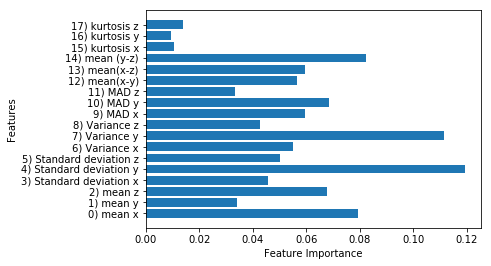

Features ranking:
0. feature 4 (0.119285)
1. feature 7 (0.111633)
2. feature 14 (0.082316)
3. feature 0 (0.079559)
4. feature 10 (0.068622)
5. feature 2 (0.067807)
6. feature 9 (0.059555)
7. feature 13 (0.059417)
8. feature 12 (0.056601)
9. feature 6 (0.055085)
10. feature 5 (0.050025)
11. feature 3 (0.045643)
12. feature 8 (0.042707)
13. feature 1 (0.034194)
14. feature 11 (0.033547)
15. feature 17 (0.013888)
16. feature 15 (0.010659)
17. feature 16 (0.009458)


In [25]:
"Visualize the results"
print('Accuracy on the training subset: {:.3f}'.format(clf.score(TrainFeatures,TrainLabels)))
print('Accuracy on the test subset: {:.3f}'.format(clf.score(TestFeatures,TestLabels)))
n_features = featuresShuffle.shape[1]
plt.barh(range(n_features), clf.feature_importances_, align ='center')
plt.yticks(np.arange(n_features), FeaturesNames)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.show()

importances = clf.feature_importances_
indices = np.argsort(importances)[::-1]
print("Features ranking:")

for f in range(n_features):
    print("%d. feature %d (%f)" % (f, indices[f], importances[indices[f]]))

The number of neighbors for the best test accuracy: 1
The best test accuracy is: 0.7263


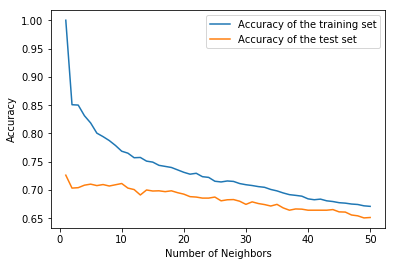

In [26]:
#KNN classifier
"Create two lists for training and test accuracies"
training_accuracy = []
test_accuracy = []

"Define a range of 1 to 50 (included) neighbors to be tested"
neighbors_settings = range(1,51)

"Loop with the KNN through the different number of neighbors to determine the most appropriate (best) and choose the one with the greatest test accuracy"
greatest_accuracy=0
greatest_neighbors = 0
for n_neighbors in neighbors_settings:
    clf_2_test = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf_2_test = clf_2_test.fit(TrainFeatures, TrainLabels)
    training_accuracy.append(clf_2_test.score(TrainFeatures, TrainLabels))
    test = clf_2_test.score(TestFeatures,TestLabels)
    test_accuracy.append(test)
    if test > greatest_accuracy:
        greatest_accuracy = test
        greatest_neighbors = n_neighbors

clf_2 = KNeighborsClassifier(n_neighbors=greatest_neighbors)
clf_2 = clf_2.fit(TrainFeatures, TrainLabels)

print('The number of neighbors for the best test accuracy: {:.0f}'.format(greatest_neighbors))
print('The best test accuracy is: {:.4f}'.format(greatest_accuracy))

"Visualize results - to help with deciding which n_neigbors yields the best results (n_neighbors=50, in this case)"
plt.plot(neighbors_settings, training_accuracy, label='Accuracy of the training set')
plt.plot(neighbors_settings, test_accuracy, label='Accuracy of the test set')
plt.ylabel('Accuracy')
plt.xlabel('Number of Neighbors')
plt.legend()






In [27]:
# Naive Bayes
clf_3 = GaussianNB()
clf_3 = clf_3.fit(TrainFeatures, TrainLabels)
GaussianNB(priors=None)
print('Accuracy on the training subset: {:.3f}'.format(clf_3.score(TrainFeatures,TrainLabels)))
print('Accuracy on the test subset: {:.3f}'.format(clf_3.score(TestFeatures,TestLabels)))


Accuracy on the training subset: 0.698
Accuracy on the test subset: 0.700
